In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import fmin_tnc

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt

==================== Load Data ====================

In [3]:
data = pd.read_table('data\\week3\\ex2data2.txt', sep=',', header=None, names=['X_col1', 'X_col2', 'Y_col3'], dtype={'X_col1': np.float64, 'X_col2': np.float64, 'Y_col3': np.uint8})

In [4]:
data.head()

,X_col1,X_col2,Y_col3
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [5]:
X = data.loc[:, ['X_col1', 'X_col2']].to_numpy()

In [6]:
y = data.loc[:, 'Y_col3'].to_numpy()

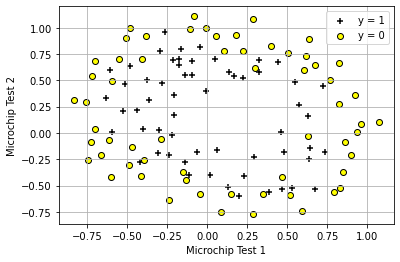

In [7]:
fig, ax = plt.subplots()

ax.scatter(np.take(X[:, 0], np.argwhere(y==1)), np.take(X[:, 1], np.argwhere(y==1)), c='black', marker='+', label='y = 1')
ax.scatter(np.take(X[:, 0], np.argwhere(y==0)), np.take(X[:, 1], np.argwhere(y==0)), c='yellow', marker='o', facecolors='none', edgecolors='black', label='y = 0')
ax.set_xlabel('Microchip Test 1', size=10)
ax.set_ylabel('Microchip Test 2', size=10)
ax.grid(True)
ax.legend(fontsize=10)

plt.show()

=========== Part 1: Regularized Logistic Regression ============

In [8]:
def mapFeature(x1, x2):
    x1.shape = (x1.size, 1)
    x2.shape = (x2.size, 1)
    
    degree = 6
    out = np.ones(shape=(x1[:, 0].size, 1))

    m, n = out.shape

    for i in range(1, degree + 1):
        for j in range(i + 1):
            r = (x1 ** (i - j)) * (x2 ** j)
            out = np.append(out, r, axis=1)

    return out

In [9]:
X1 = mapFeature(X[:, 0], X[:, 1])

In [10]:
initial_theta = np.zeros((X1.shape[1], ), dtype=np.float64)

In [11]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z)) 

In [12]:
def costFunctionReg(theta, X, y, lmbd):
    theta = theta.reshape(theta.size, 1)
    hypo = sigmoid(np.matmul(X, theta))
    
    thetaZero = theta.copy()
    thetaZero[0] = 0
    
    J = (1.0 / y.size) * (np.matmul(-1.0 * y.T, np.log(hypo)) - np.matmul((1.0 - y.T), np.log(1.0 - hypo))) + (lmbd / (2 * y.size)) * np.sum(np.power(thetaZero, 2))
    grad = (1.0 / y.size) * np.matmul(X.T, (hypo - y)) + (lmbd / y.size) * thetaZero
    
    return J.item(), grad.T.flatten()

In [13]:
cost, grad = costFunctionReg(initial_theta, X1, y.reshape(y.size, 1), 1)

In [14]:
print('Cost at initial theta (zeros): {:.6f}\nExpected cost (approx): 0.693'.format(cost))
print('Gradient at initial theta (zeros) - first five values only: \n {}'.format('\n '.join('{:.6f}'.format(item) for item in grad[0:5])))
print('Expected gradients (approx) - first five values only:\n 0.0085\n 0.0188\n 0.0001\n 0.0503\n 0.0115\n')

Cost at initial theta (zeros): 0.693147
Expected cost (approx): 0.693
Gradient at initial theta (zeros) - first five values only: 
 0.008475
 0.018788
 0.000078
 0.050345
 0.011501
Expected gradients (approx) - first five values only:
 0.0085
 0.0188
 0.0001
 0.0503
 0.0115



In [15]:
test_theta = np.ones((X1.shape[1], ), dtype=np.float64)

In [16]:
cost, grad = costFunctionReg(test_theta, X1, y.reshape(y.size, 1), 10)

In [17]:
print('Cost at test theta (with lambda = 10): {:.6f}\nExpected cost (approx): 3.16'.format(cost))
print('Gradient at test theta - first five values only: \n {}'.format('\n '.join('{:.6f}'.format(item) for item in grad[0:5])))
print('Expected gradients (approx) - first five values only:\n 0.3460\n 0.1614\n 0.1948\n 0.2269\n 0.0922\n')

Cost at test theta (with lambda = 10): 3.164509
Expected cost (approx): 3.16
Gradient at test theta - first five values only: 
 0.346045
 0.161352
 0.194796
 0.226863
 0.092186
Expected gradients (approx) - first five values only:
 0.3460
 0.1614
 0.1948
 0.2269
 0.0922



============= Part 2: Regularization and Accuracies =============

In [18]:
lmbd = 1

In [19]:
initial_theta = np.zeros((X1.shape[1], ), dtype=np.float64)

In [20]:
minimization = fmin_tnc(func=costFunctionReg, x0=initial_theta, args=(X1, y.reshape(y.size, 1), lmbd))

In [21]:
cost, grad = costFunctionReg(minimization[0], X1, y.reshape(y.size, 1), lmbd)

In [22]:
u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)

z = np.zeros((u.shape[0], v.shape[0]), dtype=np.float64)

In [23]:
for i in range(0, u.size):
    for j in range(0, v.size):
        z[i, j] = np.matmul(mapFeature(u[i:i + 1], v[j:j + 1]), minimization[0])

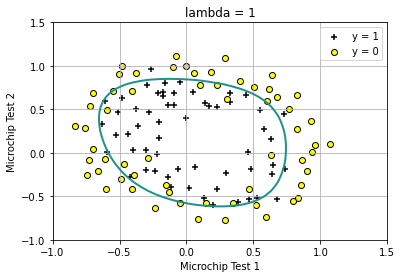

In [24]:
fig, ax = plt.subplots()

ax.scatter(np.take(X1[:, 1], np.argwhere(y==1)), np.take(X1[:, 2], np.argwhere(y==1)), c='black', marker='+', label='y = 1')
ax.scatter(np.take(X1[:, 1], np.argwhere(y==0)), np.take(X1[:, 2], np.argwhere(y==0)), c='yellow', marker='o', facecolors='none', edgecolors='black', label='y = 0')
ax.contour(u, v, z.T, 0, linewidths=2)
ax.set_xlabel('Microchip Test 1', size=10)
ax.set_ylabel('Microchip Test 2', size=10)
ax.set_title('lambda = {}'.format(lmbd))
ax.grid(True)
ax.legend(fontsize=10)

plt.show()

In [25]:
def predict(theta, X):
    return sigmoid(np.matmul(X, theta)).round()

In [26]:
p = predict(minimization[0], X1)

In [27]:
print('Train Accuracy: {:.6f}\nExpected accuracy (with lambda = 1): 83.1 (approx)'.format(np.mean((p==y).astype(np.float64)) * 100))

Train Accuracy: 83.050847
Expected accuracy (with lambda = 1): 83.1 (approx)
